# Practicel ML - KNN

### Full Name : Mohammad Shayan Shabani
### Student Number : 400105069

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

Inspect the first rows of the dataframe

In [15]:
# TODO
df = pd.read_csv('train.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [16]:
# TODO
rows = len(df.axes[0]) 
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  1102
Number of Columns:  35


In [17]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,...,1102.000000,1102.0,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,36.858439,798.846642,9.345735,2.901996,1.0,1022.294918,2.700544,66.664247,2.719601,2.029946,...,2.695100,80.0,0.821234,11.111615,2.798548,2.745009,6.911978,4.182396,2.120690,3.999093
std,9.225991,406.998576,8.208305,1.042867,0.0,606.570397,1.092115,20.469107,0.712135,1.103216,...,1.077199,0.0,0.864993,7.810963,1.298807,0.697307,6.091824,3.620049,3.109703,3.512660
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,459.750000,2.000000,2.000000,1.0,486.500000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.500000,802.000000,7.000000,3.000000,1.0,1012.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.750000,14.000000,4.000000,1.0,1557.500000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1102 non-null   int64 
 1   Attrition                 1102 non-null   object
 2   BusinessTravel            1102 non-null   object
 3   DailyRate                 1102 non-null   int64 
 4   Department                1102 non-null   object
 5   DistanceFromHome          1102 non-null   int64 
 6   Education                 1102 non-null   int64 
 7   EducationField            1102 non-null   object
 8   EmployeeCount             1102 non-null   int64 
 9   EmployeeNumber            1102 non-null   int64 
 10  EnvironmentSatisfaction   1102 non-null   int64 
 11  Gender                    1102 non-null   object
 12  HourlyRate                1102 non-null   int64 
 13  JobInvolvement            1102 non-null   int64 
 14  JobLevel                

Measure the number of unique values for each column. Note that Attrition is the target column.

In [19]:
# TODO
columns = list(df.columns.values)
for column in columns:
    print(f'{column}: {df[column].nunique()}')

Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 736
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1102
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1027
MonthlyRate: 1082
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 34
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 17


Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [20]:
# TODO
removed_columns = []
for column in columns:
    if df[column].nunique() < 2:
        removed_columns.append(column)
df = df.drop(columns=removed_columns)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,3,1,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,3,4,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,3,1,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,3,4,0,10,2,2,10,7,0,8


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [22]:
# handle uniqueness

# TODO
dictionary = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

In [23]:
# Map the column

# TODO

df['BusinessTravel_Numeric'] = df['BusinessTravel'].map(dictionary)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Numeric
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,2,0,11,2,3,3,2,1,2,1
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,1,0,15,5,3,1,0,0,0,1
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,4,0,15,2,3,13,9,3,12,1
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,1,0,7,5,3,7,7,0,7,1
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,4,0,10,2,2,10,7,0,8,1


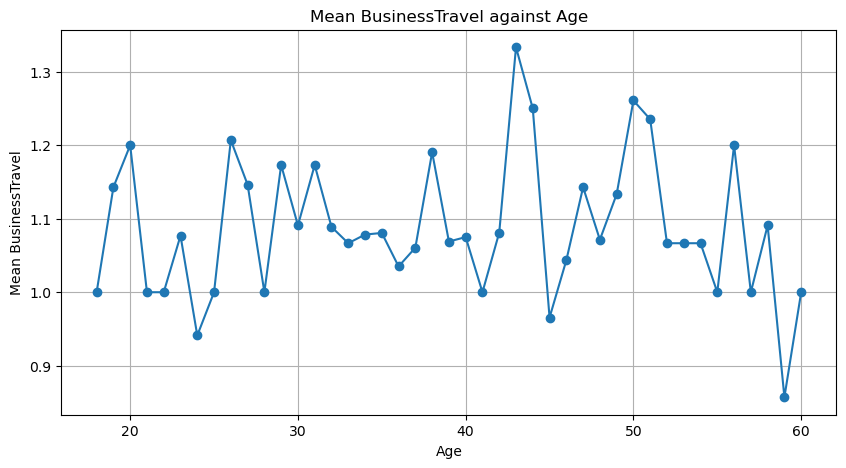

In [25]:
# plot

# TODO
mean_business_travel = df.groupby('Age')['BusinessTravel_Numeric'].mean()
plt.figure(figsize=(10, 5))
plt.plot(mean_business_travel.index, mean_business_travel.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Mean BusinessTravel')
plt.title('Mean BusinessTravel against Age')
plt.grid(True)
plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

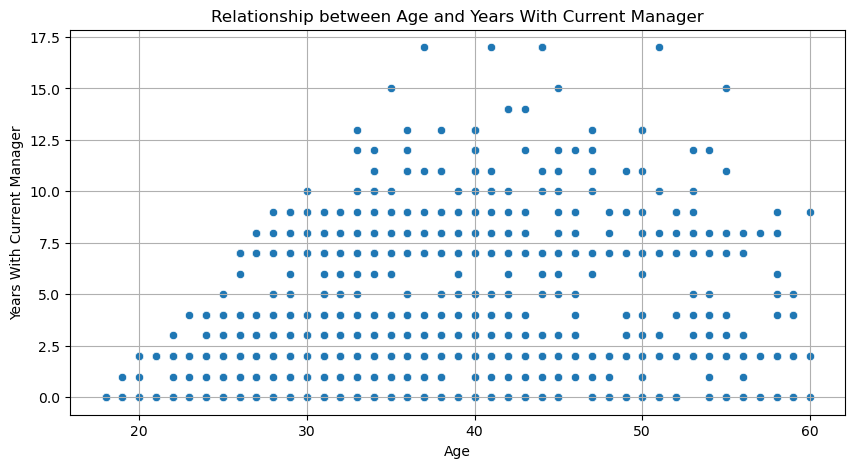

In [26]:
# TODO
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='YearsWithCurrManager')
plt.xlabel('Age')
plt.ylabel('Years With Current Manager')
plt.title('Relationship between Age and Years With Current Manager')
plt.grid(True)
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany. 

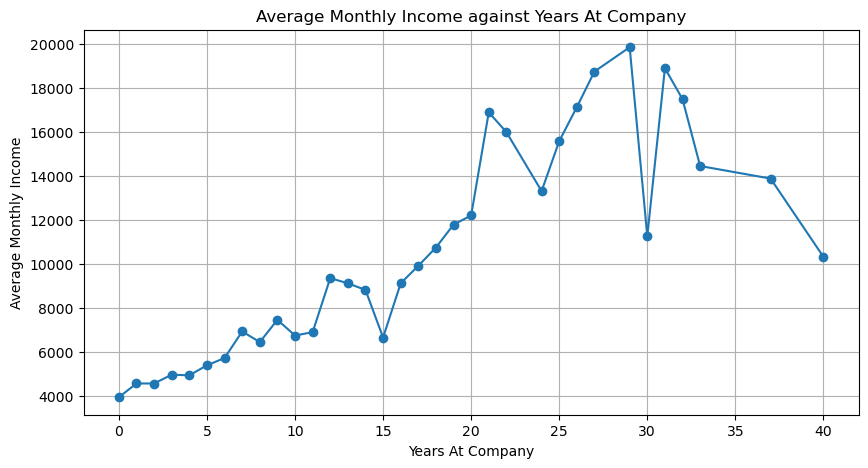

In [27]:
# TODO

avg_monthly_income = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_monthly_income.index, avg_monthly_income.values, marker='o')
plt.xlabel('Years At Company')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income against Years At Company')
plt.grid(True)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [28]:
# Label encode

# TODO
X = df.drop(columns=['Attrition'])
y = df['Attrition']

le = LabelEncoder()

X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = le.fit_transform(y)

In [29]:
# split into train and validation

# TODO
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
# lens of train and validation datasets

# TODO
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (771, 46) (771,)
Validation Set Shape: (165, 46) (165,)
Test Set Shape: (166, 46) (166,)


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [40]:
# TODO
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [44]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO
        self.k = k
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO
        return np.sqrt(np.sum((x1 - x2)**2))
        
    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [45]:
# TODO
k = 3
knn = KNN(k=k)
knn.fit(X_train, y_train)

Predict the y_train and y_test values.

In [46]:
# TODO
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Custom KNN Model - Train Accuracy: {train_accuracy:.4f}")
print(f"Custom KNN Model - Test Accuracy: {test_accuracy:.4f}")

Custom KNN Model - Train Accuracy: 0.8755
Custom KNN Model - Test Accuracy: 0.7831


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [48]:
# TODO
from sklearn.neighbors import KNeighborsClassifier
knn_sklearn = KNeighborsClassifier(n_neighbors=k)
knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [49]:
# TODO
y_test_pred = knn_sklearn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Sklearn KNN Model - Test Accuracy: {test_accuracy:.4f}")

Sklearn KNN Model - Test Accuracy: 0.7831


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**